In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic_csv=pd.read_csv('TitanicTrain.csv')
titanic=pd.DataFrame(titanic_csv)
titanic.head(10) #First 10 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


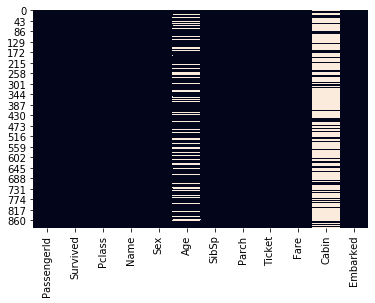

In [5]:
sns.heatmap(titanic.isnull(), cbar=False)

We can see that Age and Cabin have missing values. Cabin number does not seem to be
of much importance to play into if that person survived. So, we
will drop that column entirely.
On the other hand, age may have some pattern related to survivability,
so we will perform data imputation using Random Forest.

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hoyt, Mr. William Fisher",male,1601,G6,S
freq,1,577,7,4,644


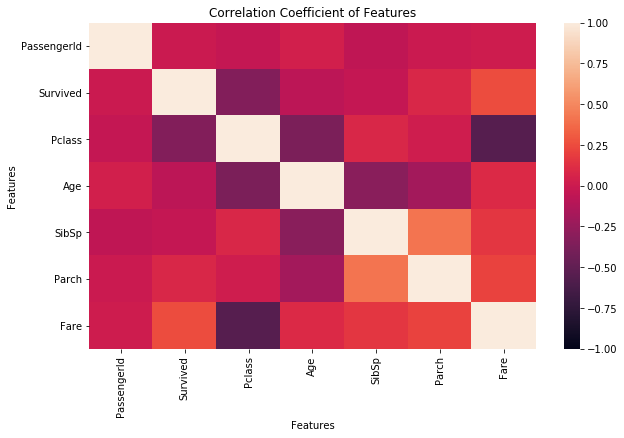

In [11]:
insurc=titanic.corr()
axes=sns.heatmap(insurc,vmin=-1,vmax=1)
axes.set_xlabel("Features")
axes.set_ylabel("Features")
axes.set_title("Correlation Coefficient of Features")
fig=axes.get_figure()
fig.set_size_inches(10,6)

In [12]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [14]:
pd.crosstab(titanic['Survived'], titanic['SibSp'])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [15]:
pd.crosstab(titanic['Survived'], titanic['Parch'])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


In [17]:
pd.crosstab(titanic['Survived'], titanic['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [18]:
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


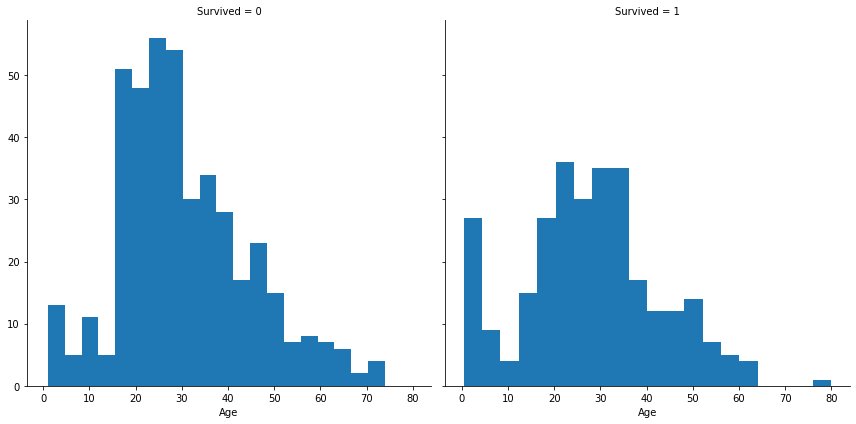

In [28]:
g = sns.FacetGrid(titanic, col='Survived', height=6, aspect=1)
g.map(plt.hist, 'Age', bins=20)

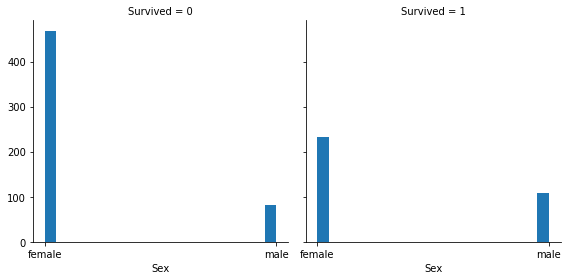

In [38]:
g = sns.FacetGrid(titanic, col='Survived', height=4)
g.map(plt.hist, 'Sex', bins=20)

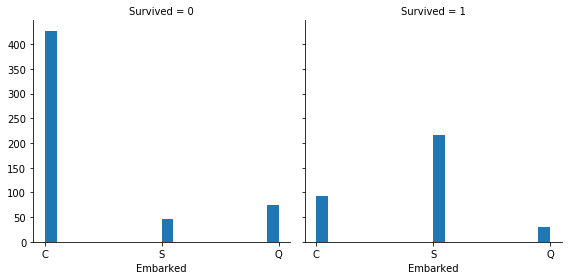

In [41]:
g = sns.FacetGrid(titanic, col='Survived', aspect=1, height=4)
g.map(plt.hist, 'Embarked', bins=20)

In [9]:
#Filling missing values
from missingpy import MissForest
imputer = MissForest()
X_impute = imputer.fit_transform(titanic[['PassengerId','Age']])

C:\Users\Avitrya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [10]:
X_impute=pd.DataFrame(X_impute)
X_impute

,0,1
0,1.0,22.00
1,2.0,38.00
2,3.0,26.00
3,4.0,35.00
4,5.0,35.00
...,...,...
886,887.0,27.00
887,888.0,19.00
888,889.0,21.53
889,890.0,26.00


In [11]:
titanic['Age']=X_impute[1]
titanic['Age']=pd.to_numeric(titanic['Age'], errors='coerce')
titanic=titanic.drop(['Name'], axis=1)

In [27]:
#titanic_csv=pd.read_csv('TitanicFinalTest')
#titanic=pd.DataFrame(titanic_csv)

In [19]:
#titanic.to_csv(path_or_buf='TitanicFinalTest', index=False)

In [28]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [29]:
titanic=titanic.drop(['Name','Ticket',], axis=1)

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [31]:
test=pd.read_csv('TitanicTest.csv')
test=pd.DataFrame(test)

In [32]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
test["Fare"] = test["Fare"].fillna(36)

In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [34]:
test=test.drop(['Name','Cabin','Ticket'], axis=1)

In [35]:
from missingpy import MissForest
imputer = MissForest()
X_impute = imputer.fit_transform(test[['PassengerId','Age']])
X_impute=pd.DataFrame(X_impute)
test['Age']=X_impute[1]
test['Age']=pd.to_numeric(test['Age'], errors='coerce')

Iteration: 0
Iteration: 1
Iteration: 2


In [36]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.037192,0.447368,0.392344,35.628080
std,120.810458,0.841838,13.334685,0.896760,0.981429,55.840503
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.530000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,38.285000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [37]:
sex_mapping = {"male": 0, "female": 1}
titanic['Sex'] = titanic['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [38]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
titanic['Embarked'] = titanic['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [191]:
import pandas as pd
X['Pclass']=X['Pclass'].astype('object')
X['Sex']=X['Sex'].astype('object')
X['SibSp']=X['SibSp'].astype('object')
X['Parch']=X['Parch'].astype('object')
X['Embarked']=X['Embarked'].astype('object')
Xx=pd.get_dummies(X[['Pclass','Sex','SibSp','Parch','Embarked']], drop_first=True)
Xx=pd.DataFrame(Xx)

KeyError: 'Pclass'

In [193]:
#Xx['Age']=X['Age']
#Xx['Fare']=X['Fare']
#X=Xx
X

,Age,Fare
0,22.00,7.2500
1,38.00,71.2833
2,26.00,7.9250
3,35.00,53.1000
4,35.00,8.0500
...,...,...
886,27.00,13.0000
887,19.00,30.0000
888,21.53,23.4500
889,26.00,30.0000


Algorithms

In [192]:
from sklearn.model_selection import train_test_split

X=titanic.drop(['Survived', 'PassengerId','SibSp', 'Parch', 'Pclass', 'Embarked','Sex'], axis=1)
y=titanic['Survived']
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=0)

In [39]:
train

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,Rev
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,Miss
888,22.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,Miss
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,Mr


In [ ]:
from sklearn.model_selection import train_test_split

X=train.drop(['Survived', 'PassengerId','SibSp', 'Parch', 'Pclass', 'Embarked','Sex'], axis=1)
y=train['Survived']

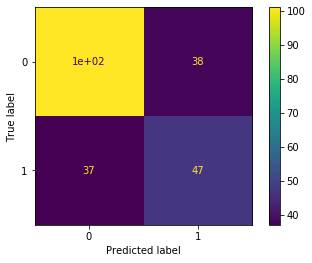

In [194]:
from sklearn.tree import DecisionTreeClassifier

decTree=DecisionTreeClassifier().fit(X_train,y_train) 
decTreePred=decTree.predict(X_test)

from sklearn.metrics import confusion_matrix,plot_confusion_matrix

cm=confusion_matrix(y_test,decTreePred)
plot_confusion_matrix(decTree,X_test,y_test)
plt.show()

In [195]:
from sklearn import metrics
print("Accuracy:-")
print(metrics.accuracy_score(y_test, decTreePred))

from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(y_test, decTreePred, average='macro'))

from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(y_test, decTreePred, average='macro'))

from sklearn.metrics import f1_score
print("\n")
print("F1 Score:-")
print(f1_score(y_test, decTreePred, average='macro'))

Accuracy:-
0.6636771300448431


Recall Score:-
0.6430712572798905


Precision Score:-
0.6424126172208013


F1 Score:-
0.6427274475038984


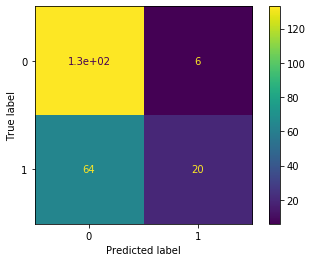

In [196]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state = 0)

from sklearn.svm import SVC

svmLinear=SVC(kernel='linear').fit(X_train,y_train) 
svmPred = svmLinear.predict(X_test)

cm=confusion_matrix(y_test,svmPred)
plot_confusion_matrix(svmLinear,X_test,y_test)
plt.show()

In [197]:
from sklearn import metrics
print("Accuracy:-")
print(metrics.accuracy_score(y_test, svmPred))

from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(y_test, svmPred, average='macro'))

from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(y_test, svmPred, average='macro'))

from sklearn.metrics import f1_score
print("\n")
print("F1 Score:-")
print(f1_score(y_test, svmPred, average='macro'))

Accuracy:-
0.6860986547085202


Recall Score:-
0.5974648852346695


Precision Score:-
0.7221788363920344


F1 Score:-
0.5776515151515151


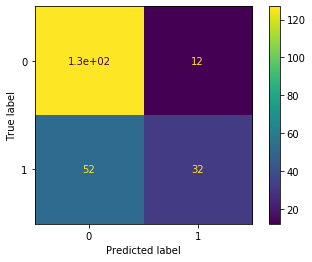

In [198]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)
knnPred=knn.predict(X_test) 

cm=confusion_matrix(y_test,knnPred)
plot_confusion_matrix(knn,X_test,y_test)
plt.show()

In [199]:
from sklearn import metrics
print("Accuracy:-")
print(metrics.accuracy_score(y_test, knnPred))

from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(y_test, knnPred, average='macro'))

from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(y_test, knnPred, average='macro'))

from sklearn.metrics import f1_score
print("\n")
print("F1 Score:-")
print(f1_score(y_test, knnPred, average='macro'))

Accuracy:-
0.7130044843049327


Recall Score:-
0.6473107228502912


Precision Score:-
0.7183849669883189


F1 Score:-
0.64937106918239


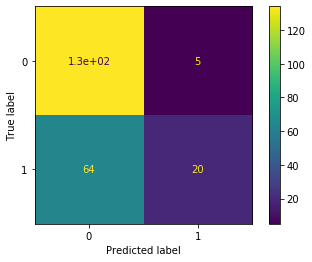

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB().fit(X_train,y_train)
gnbPred=gnb.predict(X_test)

cm=confusion_matrix(y_test,gnbPred)
plot_confusion_matrix(gnb,X_test,y_test)
plt.show()

In [201]:
from sklearn import metrics
print("Accuracy:-")
print(metrics.accuracy_score(y_test, gnbPred))

from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(y_test, gnbPred, average='macro'))

from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(y_test, gnbPred, average='macro'))

from sklearn.metrics import f1_score
print("\n")
print("F1 Score:-")
print(f1_score(y_test, gnbPred, average='macro'))

Accuracy:-
0.6905829596412556


Recall Score:-
0.6010620075368277


Precision Score:-
0.7383838383838384


F1 Score:-
0.581112351291754


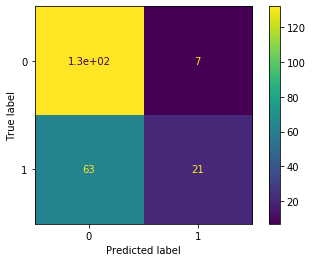

In [202]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

from sklearn.linear_model import LogisticRegression

logReg=LogisticRegression()
logReg.fit(X_train,y_train)
logPred=logReg.predict(X_test)

cm=confusion_matrix(y_test,logPred)
plot_confusion_matrix(logReg,X_test,y_test)
plt.show()

In [203]:
from sklearn import metrics
print("Accuracy:-")
print(metrics.accuracy_score(y_test, logPred))

from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(y_test, logPred, average='macro'))

from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(y_test, logPred, average='macro'))

from sklearn.metrics import f1_score
print("\n")
print("F1 Score:-")
print(f1_score(y_test, logPred, average='macro'))

Accuracy:-
0.6860986547085202


Recall Score:-
0.599820143884892


Precision Score:-
0.7134615384615385


F1 Score:-
0.5827095808383234


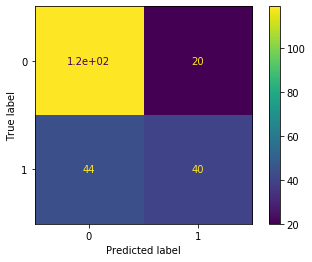

In [204]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

from sklearn.naive_bayes import MultinomialNB

mNB=MultinomialNB()
mNB.fit(X_train, y_train)
mNBPred=mNB.predict(X_test)

cm=confusion_matrix(y_test,mNBPred)
plot_confusion_matrix(mNB,X_test,y_test)
plt.show()

In [205]:
from sklearn import metrics
print("Accuracy:-")
print(metrics.accuracy_score(y_test, mNBPred))

from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(y_test, mNBPred, average='macro'))

from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(y_test, mNBPred, average='macro'))

from sklearn.metrics import f1_score
print("\n")
print("F1 Score:-")
print(f1_score(y_test, mNBPred, average='macro'))

Accuracy:-
0.7130044843049327


Recall Score:-
0.6661527920520727


Precision Score:-
0.6983640081799591


F1 Score:-
0.6718175128771156


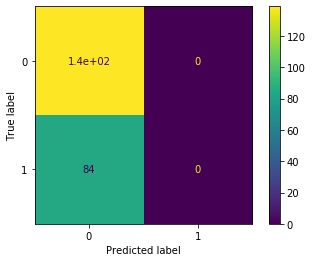

In [206]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

from sklearn.naive_bayes import BernoulliNB

bNB=BernoulliNB()
bNB.fit(X_train, y_train)
bNBPred=bNB.predict(X_test)

cm=confusion_matrix(y_test,bNBPred)
plot_confusion_matrix(bNB,X_test,y_test)
plt.show()

In [207]:
from sklearn import metrics
print("Accuracy:-")
print(metrics.accuracy_score(y_test, bNBPred))

from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(y_test, bNBPred, average='macro'))

from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(y_test, bNBPred, average='macro'))

from sklearn.metrics import f1_score
print("\n")
print("F1 Score:-")
print(f1_score(y_test, bNBPred, average='macro'))

Accuracy:-
0.6233183856502242


Recall Score:-
0.5


Precision Score:-
0.3116591928251121


F1 Score:-
0.3839779005524862


C:\Users\Avitrya\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


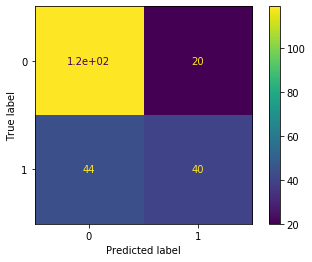

In [208]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

from sklearn.naive_bayes import ComplementNB

cNB=ComplementNB()
cNB.fit(X_train, y_train)
cNBPred=cNB.predict(X_test)

cm=confusion_matrix(y_test,cNBPred)
plot_confusion_matrix(cNB,X_test,y_test)
plt.show()

In [209]:
from sklearn import metrics
print("Accuracy:-")
print(metrics.accuracy_score(y_test, cNBPred))

from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(y_test, cNBPred, average='macro'))

from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(y_test, cNBPred, average='macro'))

from sklearn.metrics import f1_score
print("\n")
print("F1 Score:-")
print(f1_score(y_test, cNBPred, average='macro'))

Accuracy:-
0.7130044843049327


Recall Score:-
0.6661527920520727


Precision Score:-
0.6983640081799591


F1 Score:-
0.6718175128771156


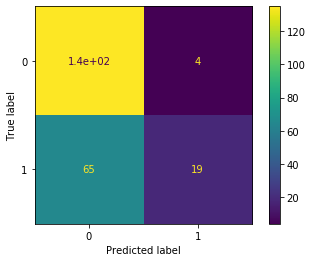

In [210]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
ldaPred=lda.predict(X_test)

cm=confusion_matrix(y_test,ldaPred)
plot_confusion_matrix(lda,X_test,y_test)
plt.show()

In [211]:
from sklearn import metrics
print("Accuracy:-")
print(metrics.accuracy_score(y_test, ldaPred))

from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(y_test, ldaPred, average='macro'))

from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(y_test, ldaPred, average='macro'))

from sklearn.metrics import f1_score
print("\n")
print("F1 Score:-")
print(f1_score(y_test, ldaPred, average='macro'))

Accuracy:-
0.6905829596412556


Recall Score:-
0.598706748886605


Precision Score:-
0.7505434782608695


F1 Score:-
0.5758001819535191


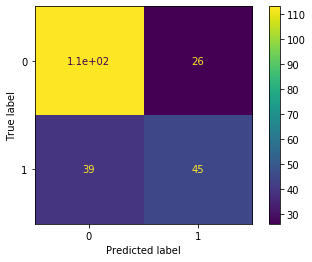

In [212]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(max_depth=12, n_estimators=150)
rf.fit(X_train, y_train)
rfPred=rf.predict(X_test)

cm=confusion_matrix(y_test,rfPred)
plot_confusion_matrix(rf,X_test,y_test)
plt.show()

In [213]:
from sklearn import metrics
print("Accuracy:-")
print(metrics.accuracy_score(y_test, rfPred))

from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(y_test, rfPred, average='macro'))

from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(y_test, rfPred, average='macro'))

from sklearn.metrics import f1_score
print("\n")
print("F1 Score:-")
print(f1_score(y_test, rfPred, average='macro'))

Accuracy:-
0.7085201793721974


Recall Score:-
0.6743319630010278


Precision Score:-
0.6886119347664937


F1 Score:-
0.6786387318479106


In [215]:
from sklearn import metrics
print("Accuracy:-")
print(metrics.accuracy_score(y_test, rcPred))

from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(y_test, rcPred, average='macro'))

from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(y_test, rcPred, average='macro'))

from sklearn.metrics import f1_score
print("\n")
print("F1 Score:-")
print(f1_score(y_test, rcPred, average='macro'))

Accuracy:-
0.6860986547085202


Recall Score:-
0.592754367934224


Precision Score:-
0.7449118046132972


F1 Score:-
0.5668701442841287


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
from tensorflow import set_random_seed

Using TensorFlow backend.
C:\Users\Avitrya\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Avitrya\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Avitrya\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Avitrya\Anaconda3\lib\site-packages\tensorflow\python\framework\d

In [58]:
train = pd.read_csv('TitanicTrain.csv', )
test = pd.read_csv('TitanicTest.csv')
df = pd.concat([train, test], axis=0, sort=True)

In [59]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

In [60]:
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df.replace({'Title': mapping}, inplace=True)

In [61]:
title_ages = dict(df.groupby('Title')['Age'].median())
df['age_med'] = df['Title'].apply(lambda x: title_ages[x])
df['Age'].fillna(df['age_med'], inplace=True, )
del df['age_med']

In [62]:
class_fares = dict(df.groupby('Pclass')['Fare'].median())
df['fare_med'] = df['Pclass'].apply(lambda x: class_fares[x])
df['Fare'].fillna(df['fare_med'], inplace=True, )
del df['fare_med']

In [63]:
df['Embarked'].fillna(method='backfill', inplace=True)

In [64]:
train = df[pd.notnull(df['Survived'])]
test = df[pd.isnull(df['Survived'])]

In [65]:
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

In [66]:
categorical = ['Embarked']

for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

In [67]:
categorical = ['Title']

for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

In [68]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [46]:
train = df[pd.notnull(df['Survived'])]
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

In [47]:
X_train, X_val, y_train, y_val = train_test_split(
    train.drop(['Survived'], axis=1),
    train['Survived'],
    test_size=0.2, random_state=42)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

rf = RandomForestClassifier(random_state=42)

In [50]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [53]:
from sklearn import metrics
print("Accuracy:-")
print(metrics.accuracy_score(y_val, rf.predict(X_val)))

from sklearn.metrics import recall_score
print("\n")
print("Recall Score:-")
print(recall_score(y_val, rf.predict(X_val), average='macro'))

from sklearn.metrics import precision_score
print("\n")
print("Precision Score:-")
print(precision_score(y_val, rf.predict(X_val), average='macro'))

from sklearn.metrics import f1_score
print("\n")
print("F1 Score:-")
print(f1_score(y_val, rf.predict(X_val), average='macro'))

Accuracy:-
0.8212290502793296


Recall Score:-
0.8157014157014157


Precision Score:-
0.8157014157014157


F1 Score:-
0.8157014157014157


In [57]:
test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Mr
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Mrs
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Mr
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Mr
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,Mrs


In [69]:
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [70]:
X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

In [71]:
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    
    seed(42)
    set_random_seed(42)
    model = Sequential()
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    model.add(Dropout(dr))
    model.add(Dense(1, activation='sigmoid'))  # output layer
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [72]:
model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________
None


In [77]:
training = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0)
val_accuracy = np.mean(training.history['val_accuracy'])
print(val_accuracy)

0.8826815485954285


In [86]:
train

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,Rev
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,Miss
888,22.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,Miss
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,Mr


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [91]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
print(decision_tree.score(X_train, y_train))

0.9809203142536476


In [92]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
print(logreg.score(X_train, y_train))

0.8327721661054994


In [93]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
print(svc.score(X_train, y_train))

0.8428731762065096


In [94]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
print(knn.score(X_train, y_train))

0.8720538720538721


In [96]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
print(gaussian.score(X_train, y_train))

0.41414141414141414


In [99]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
print(decision_tree.score(X_train, y_train))

0.9809203142536476


In [100]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
print(random_forest.score(X_train, y_train))

0.9809203142536476


In [101]:
from sklearn.linear_model import RidgeClassifierCV

ridge = RidgeClassifierCV()
ridge.fit(X_train, y_train)
Y_pred = ridge.predict(X_test)
print(ridge.score(X_train, y_train))

0.8327721661054994


In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
Y_pred = lda.predict(X_test)
print(lda.score(X_train, y_train))

0.8327721661054994


In [108]:
acdt=0.9809203142536476
acsvm=0.8428731762065096
acknn=0.8720538720538721
acgnb=0.7802690582959642
aclog=0.8327721661054994
acmnb=0.7174887892376681
acbnb=0.7802690582959642
accnb=0.7309417040358744
aclda=0.8327721661054994
acrf=0.9809203142536476
acrc=0.8327721661054994
acnn=0.8826815485954285

In [109]:
ac_scores={
    'DecTree':acdt,
    'SVM':acsvm,
    'KNN':acknn,
    'GaussNBay':acgnb,
    'LogReg':aclog,
    'MultNBay':acmnb,
    'BernNBay':acbnb,
    'CompNBay':accnb,
    'LinearDA':aclda,
    'RandForest':acrf,
    'Ridge':acrc,
    'Neural Network':acnn
}

Text(0.5, 0, 'Accuracy')

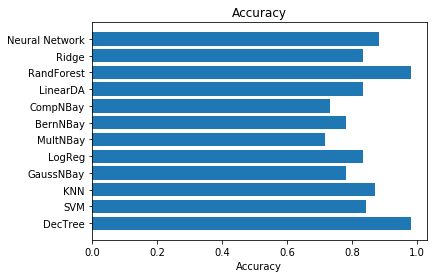

In [110]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.barh(range(len(ac_scores)), list(ac_scores.values()), align='center')
plt.yticks(range(len(ac_scores)), list(ac_scores.keys()))
plt.xlabel('Accuracy')